# Load Dependencies

In [1]:
model_list = ['CoPhy', 'BB'] # A list of the model names to compare
train_size= '2000examples_400x400complex.mat' #['dataShort.mat', 'data1000.mat', 'dataFull.mat']
num_of_epochs=4000


In [2]:
%matplotlib inline

import torch
import re
import glob
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress.fastprogress import master_bar, progress_bar
import sys
sys.path.append('../../scripts/')

from config_plots import global_settings
global_settings()

from parse_results import parse_results

import warnings
warnings.filterwarnings("ignore")

full_path = '../../eval_saved/electromagnetic'
os.chdir(full_path+'/results/')

torch.cuda.set_device(7)
device = torch.device('cuda:7')

-------------------
# Find Model

In [3]:
def find_model(name, train_size, target_dir=""):
    result_list = glob.glob(target_dir + '*.txt')
    if len(result_list):
        results = []
        for file in result_list:
            d = parse_results(file)
            if d['name'] == name and d["params"]["data_params"]["train_size"] == train_size:
                results.append(d)
        return results
    else:
        raise RuntimeError(
            "No txt file find under the directory. Please use os.chdir(TARGET DIR) before use it, or specify target_dir parameter."
        )
        
def replace_str(fin, fout, str_in, str_out):
    fin = open(fin, "rt")
    fout = open(fout, "wt")
    for line in fin:
        fout.write(line.replace(str_in, str_out))
    fin.close()
    fout.close()

## Table of Results on 2k Training Data

In [4]:

mse, overlap = {}, {}
for model in model_list:
    results = find_model(model, train_size)
    mse[model] = [i['mse_wave_funtion'] for i in results]
    overlap[model] = [i['wave_function_overlap'] for i in results]
# print(mse)
mse_df = pd.DataFrame(mse)
overlap_df = pd.DataFrame(overlap)
out = pd.concat((mse_df.mean(), mse_df.std(), overlap_df.mean(), overlap_df.std()), axis=1)
out.columns = ['$\overline{MSE}$', '$\sigma_{MSE}$', '$\overline{I_{wf}}$', '$\sigma_{I_{wf}}$']
out.transpose()

,CoPhy
$\overline{MSE}$,0.313246
$\sigma_{MSE}$,NaN
$\overline{I_{wf}}$,0.007348
$\sigma_{I_{wf}}$,NaN


In [5]:
mse, overlap = {}, {}
for model in model_list:
    results = find_model(model, train_size)
    mse[model] = [i['mse_wave_funtion'] for i in results]
    overlap[model] = [i['wave_function_overlap'] for i in results]
mse_df = pd.DataFrame(mse)
overlap_df = pd.DataFrame(overlap)
out = pd.concat((mse_df.mean(), mse_df.std(), overlap_df.mean(), overlap_df.std()), axis=1)
out.columns = ['$\overline{MSE}$', '$\sigma_{MSE}$', '$\overline{I_{wf}}$', '$\sigma_{I_{wf}}$']
out.transpose()

,CoPhy
$\overline{MSE}$,0.313246
$\sigma_{MSE}$,NaN
$\overline{I_{wf}}$,0.007348
$\sigma_{I_{wf}}$,NaN


------------------------------------
# Convergence Plot

### Test MSE

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


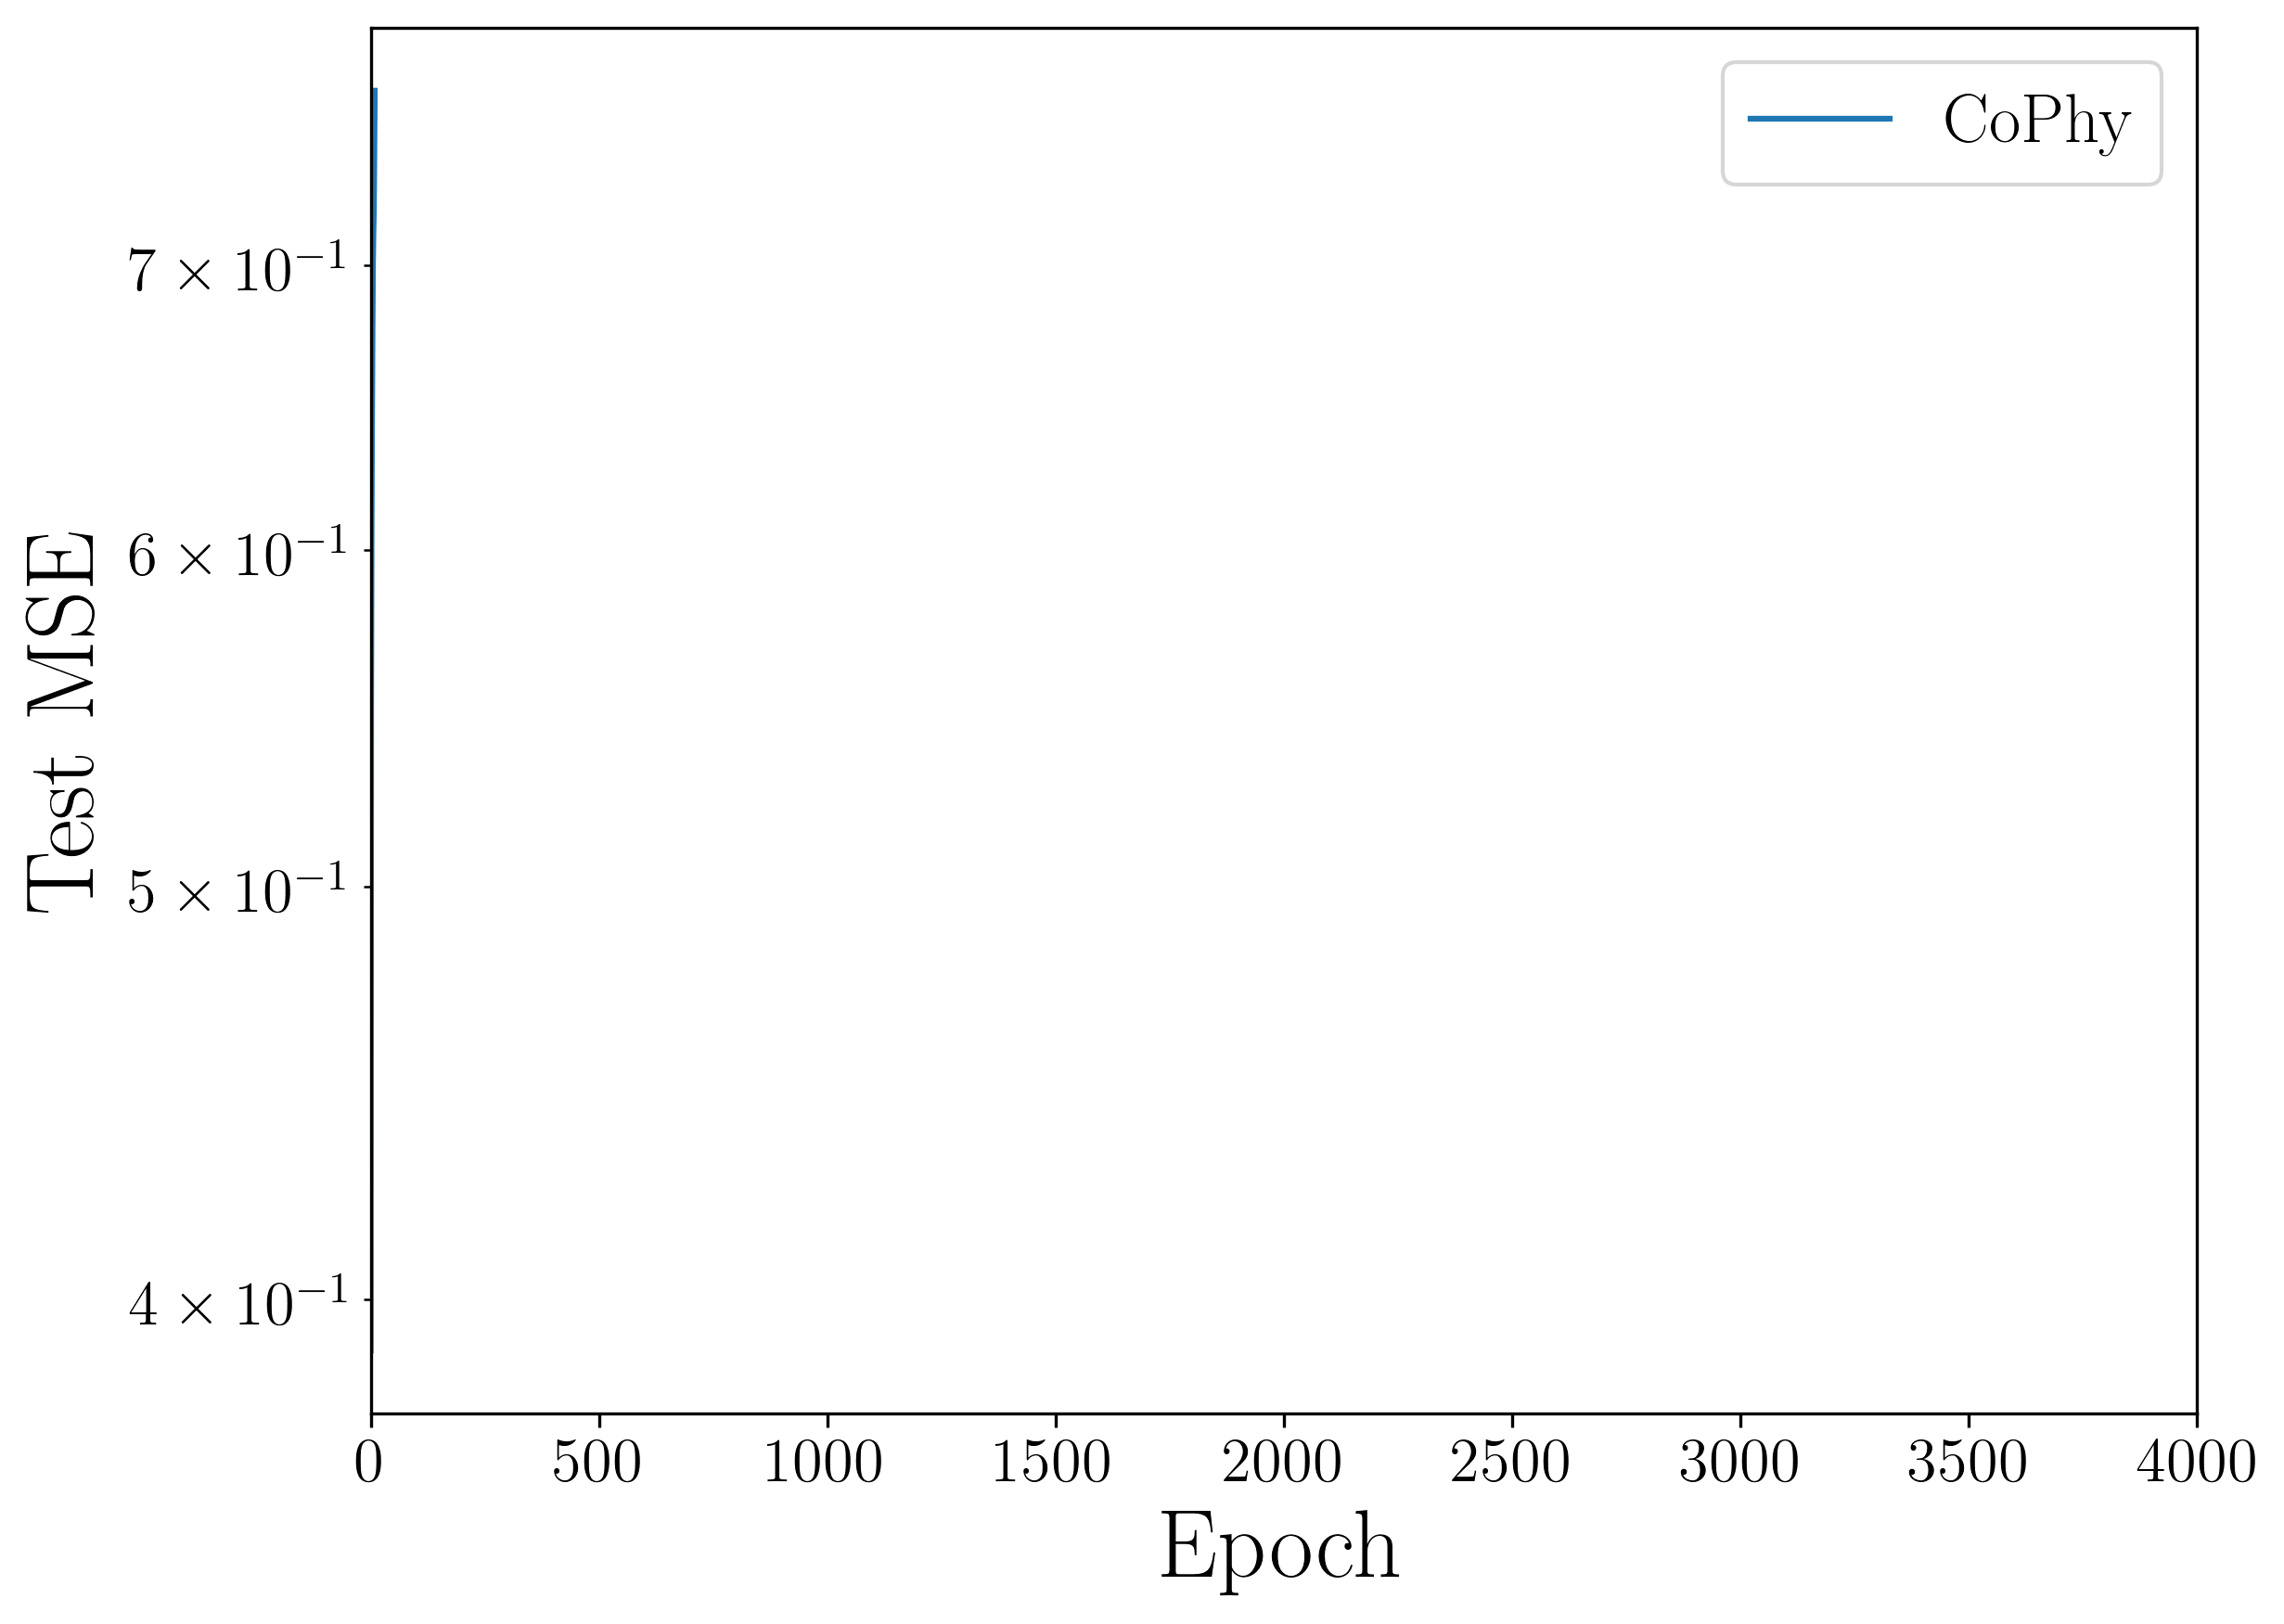

In [6]:
loss_dict = {}
for model in model_list:
    results = find_model(model, train_size)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, num_of_epochs))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['test mse'], ax=ax, label=name)
    title = "Convergence On The Test Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('Test MSE', fontsize=25)
plt.yscale('log')
ax.legend(fontsize=18)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
plt.show()

fig.savefig('../%s.pdf' % title, dpi = 200)

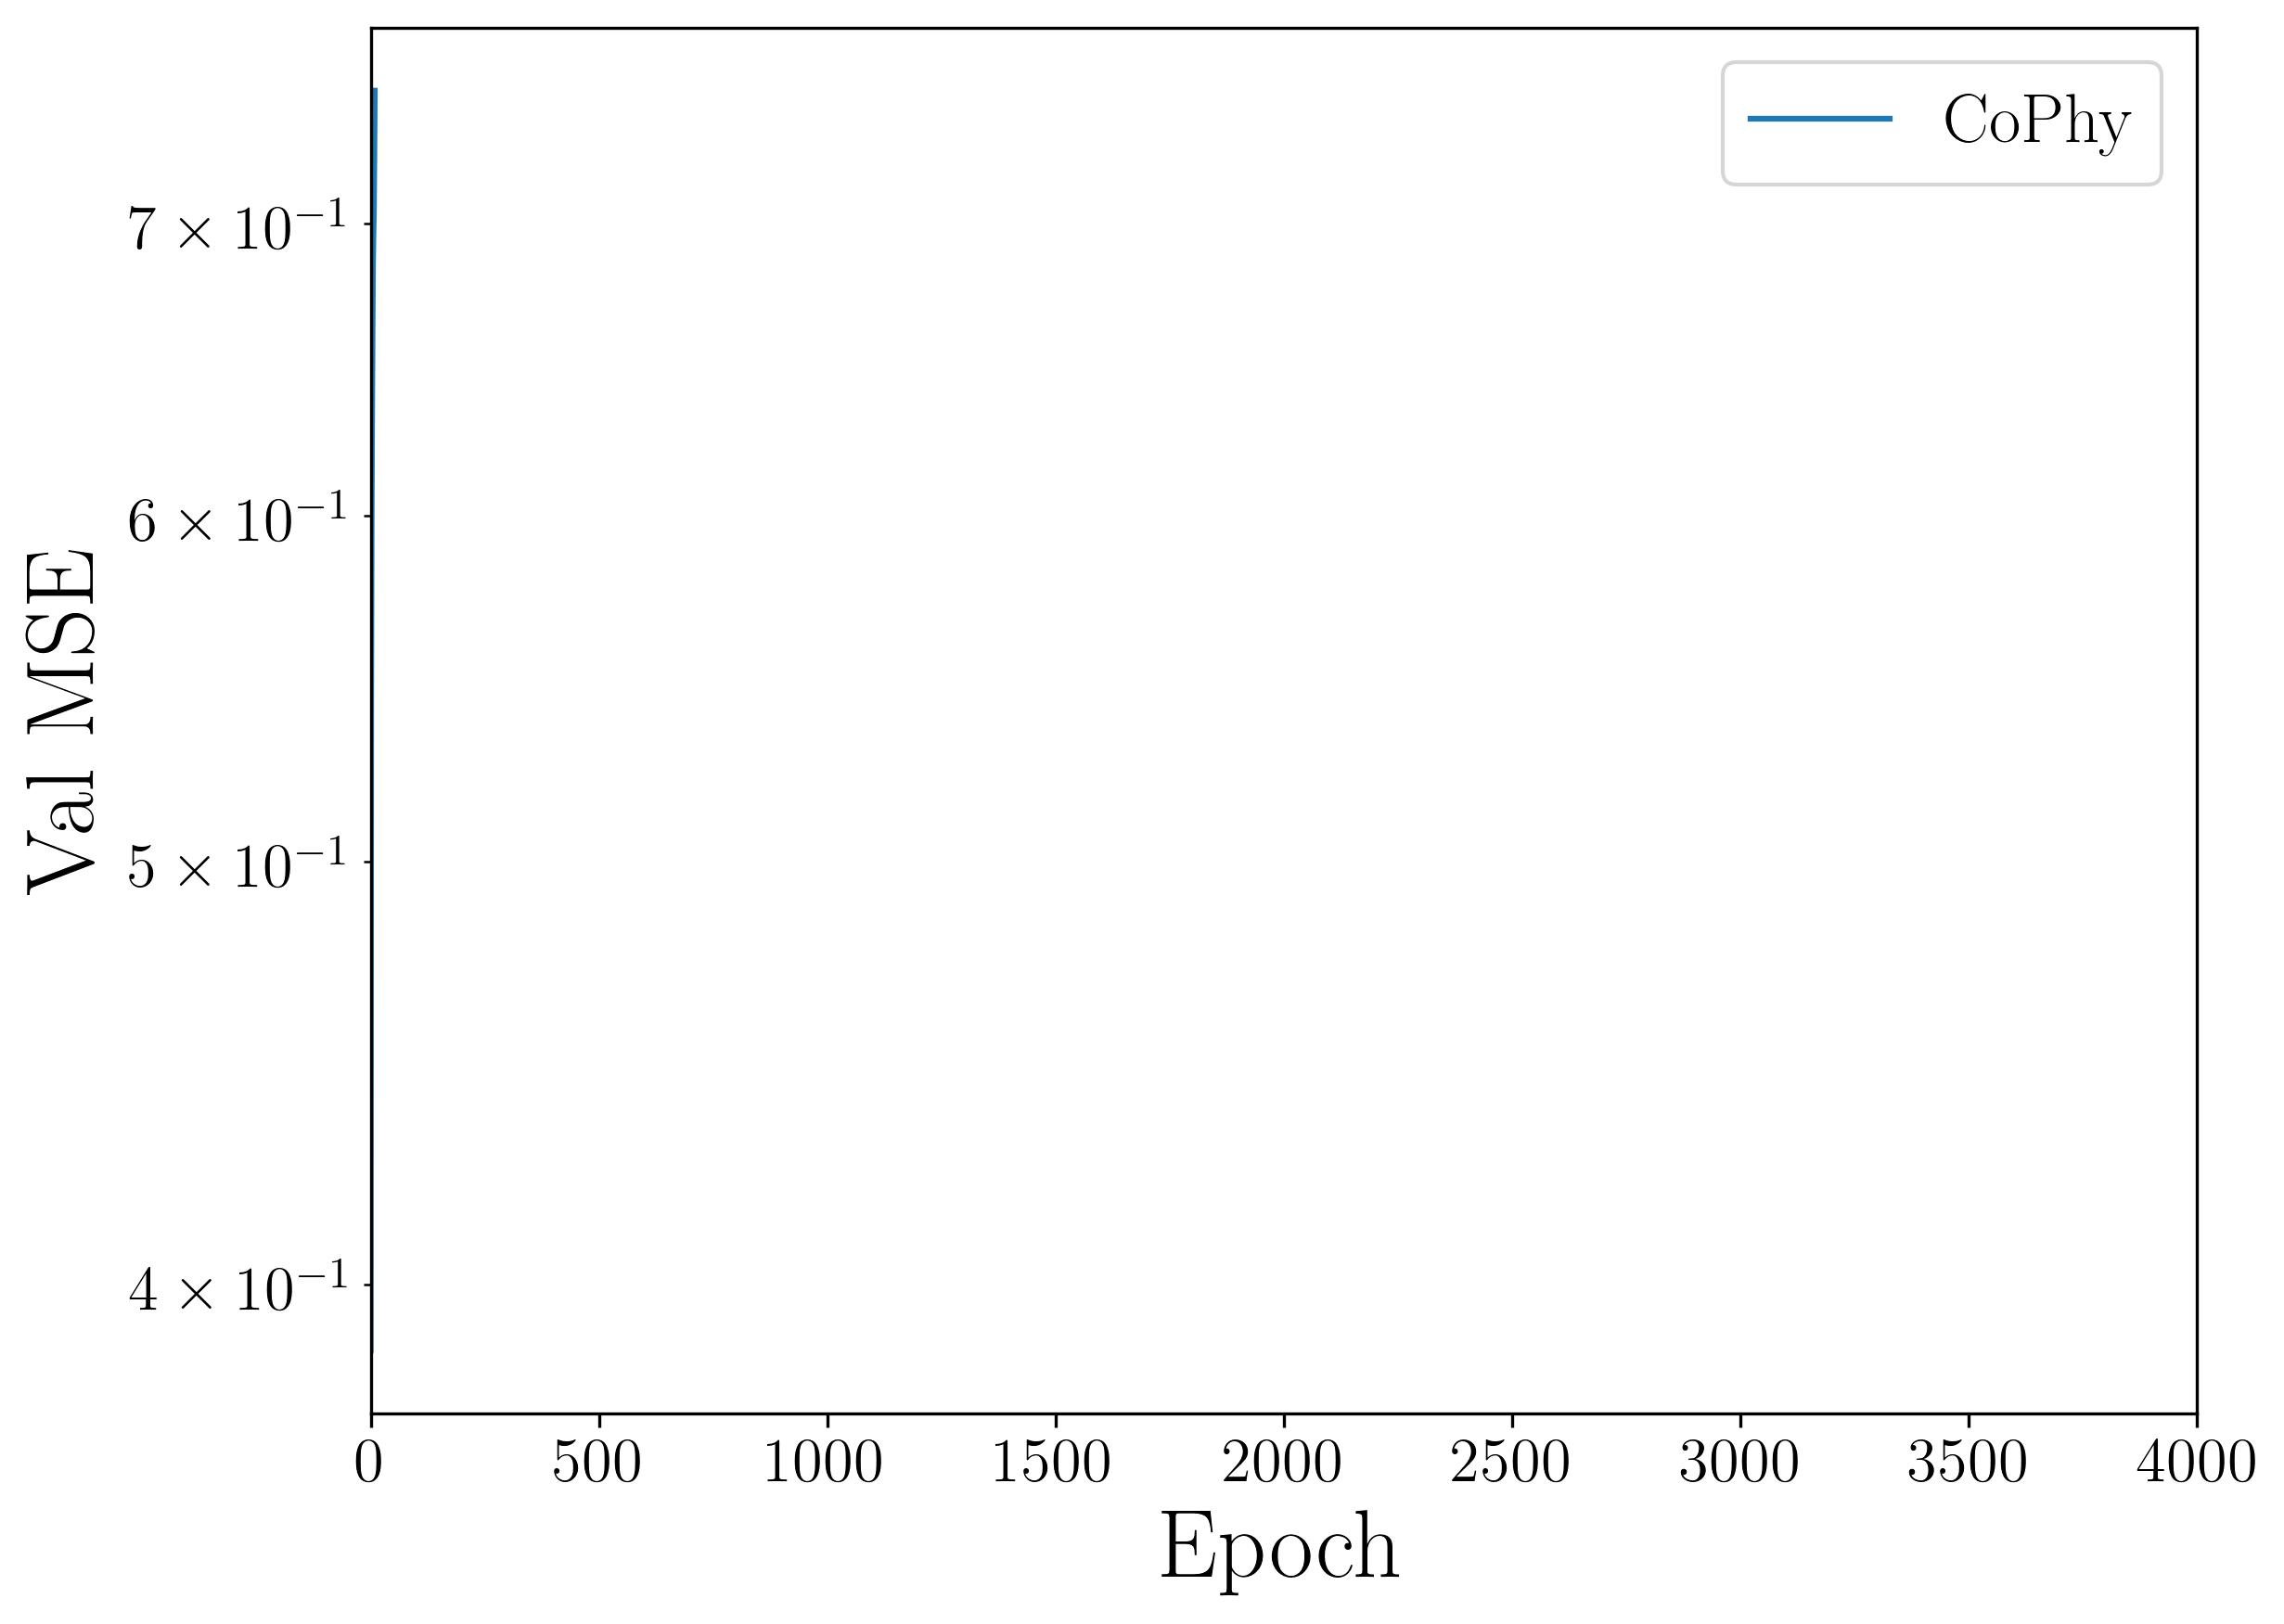

In [7]:
loss_dict = {}
for model in model_list:
    results = find_model(model, train_size)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, num_of_epochs))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['val mse'], ax=ax, label=name)
    title = "Convergence On The Val Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('Val MSE', fontsize=25)
plt.yscale('log')
ax.legend(fontsize=18)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
plt.show()

fig.savefig('../%s.pdf' % title, dpi = 200)

### Train MSE

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


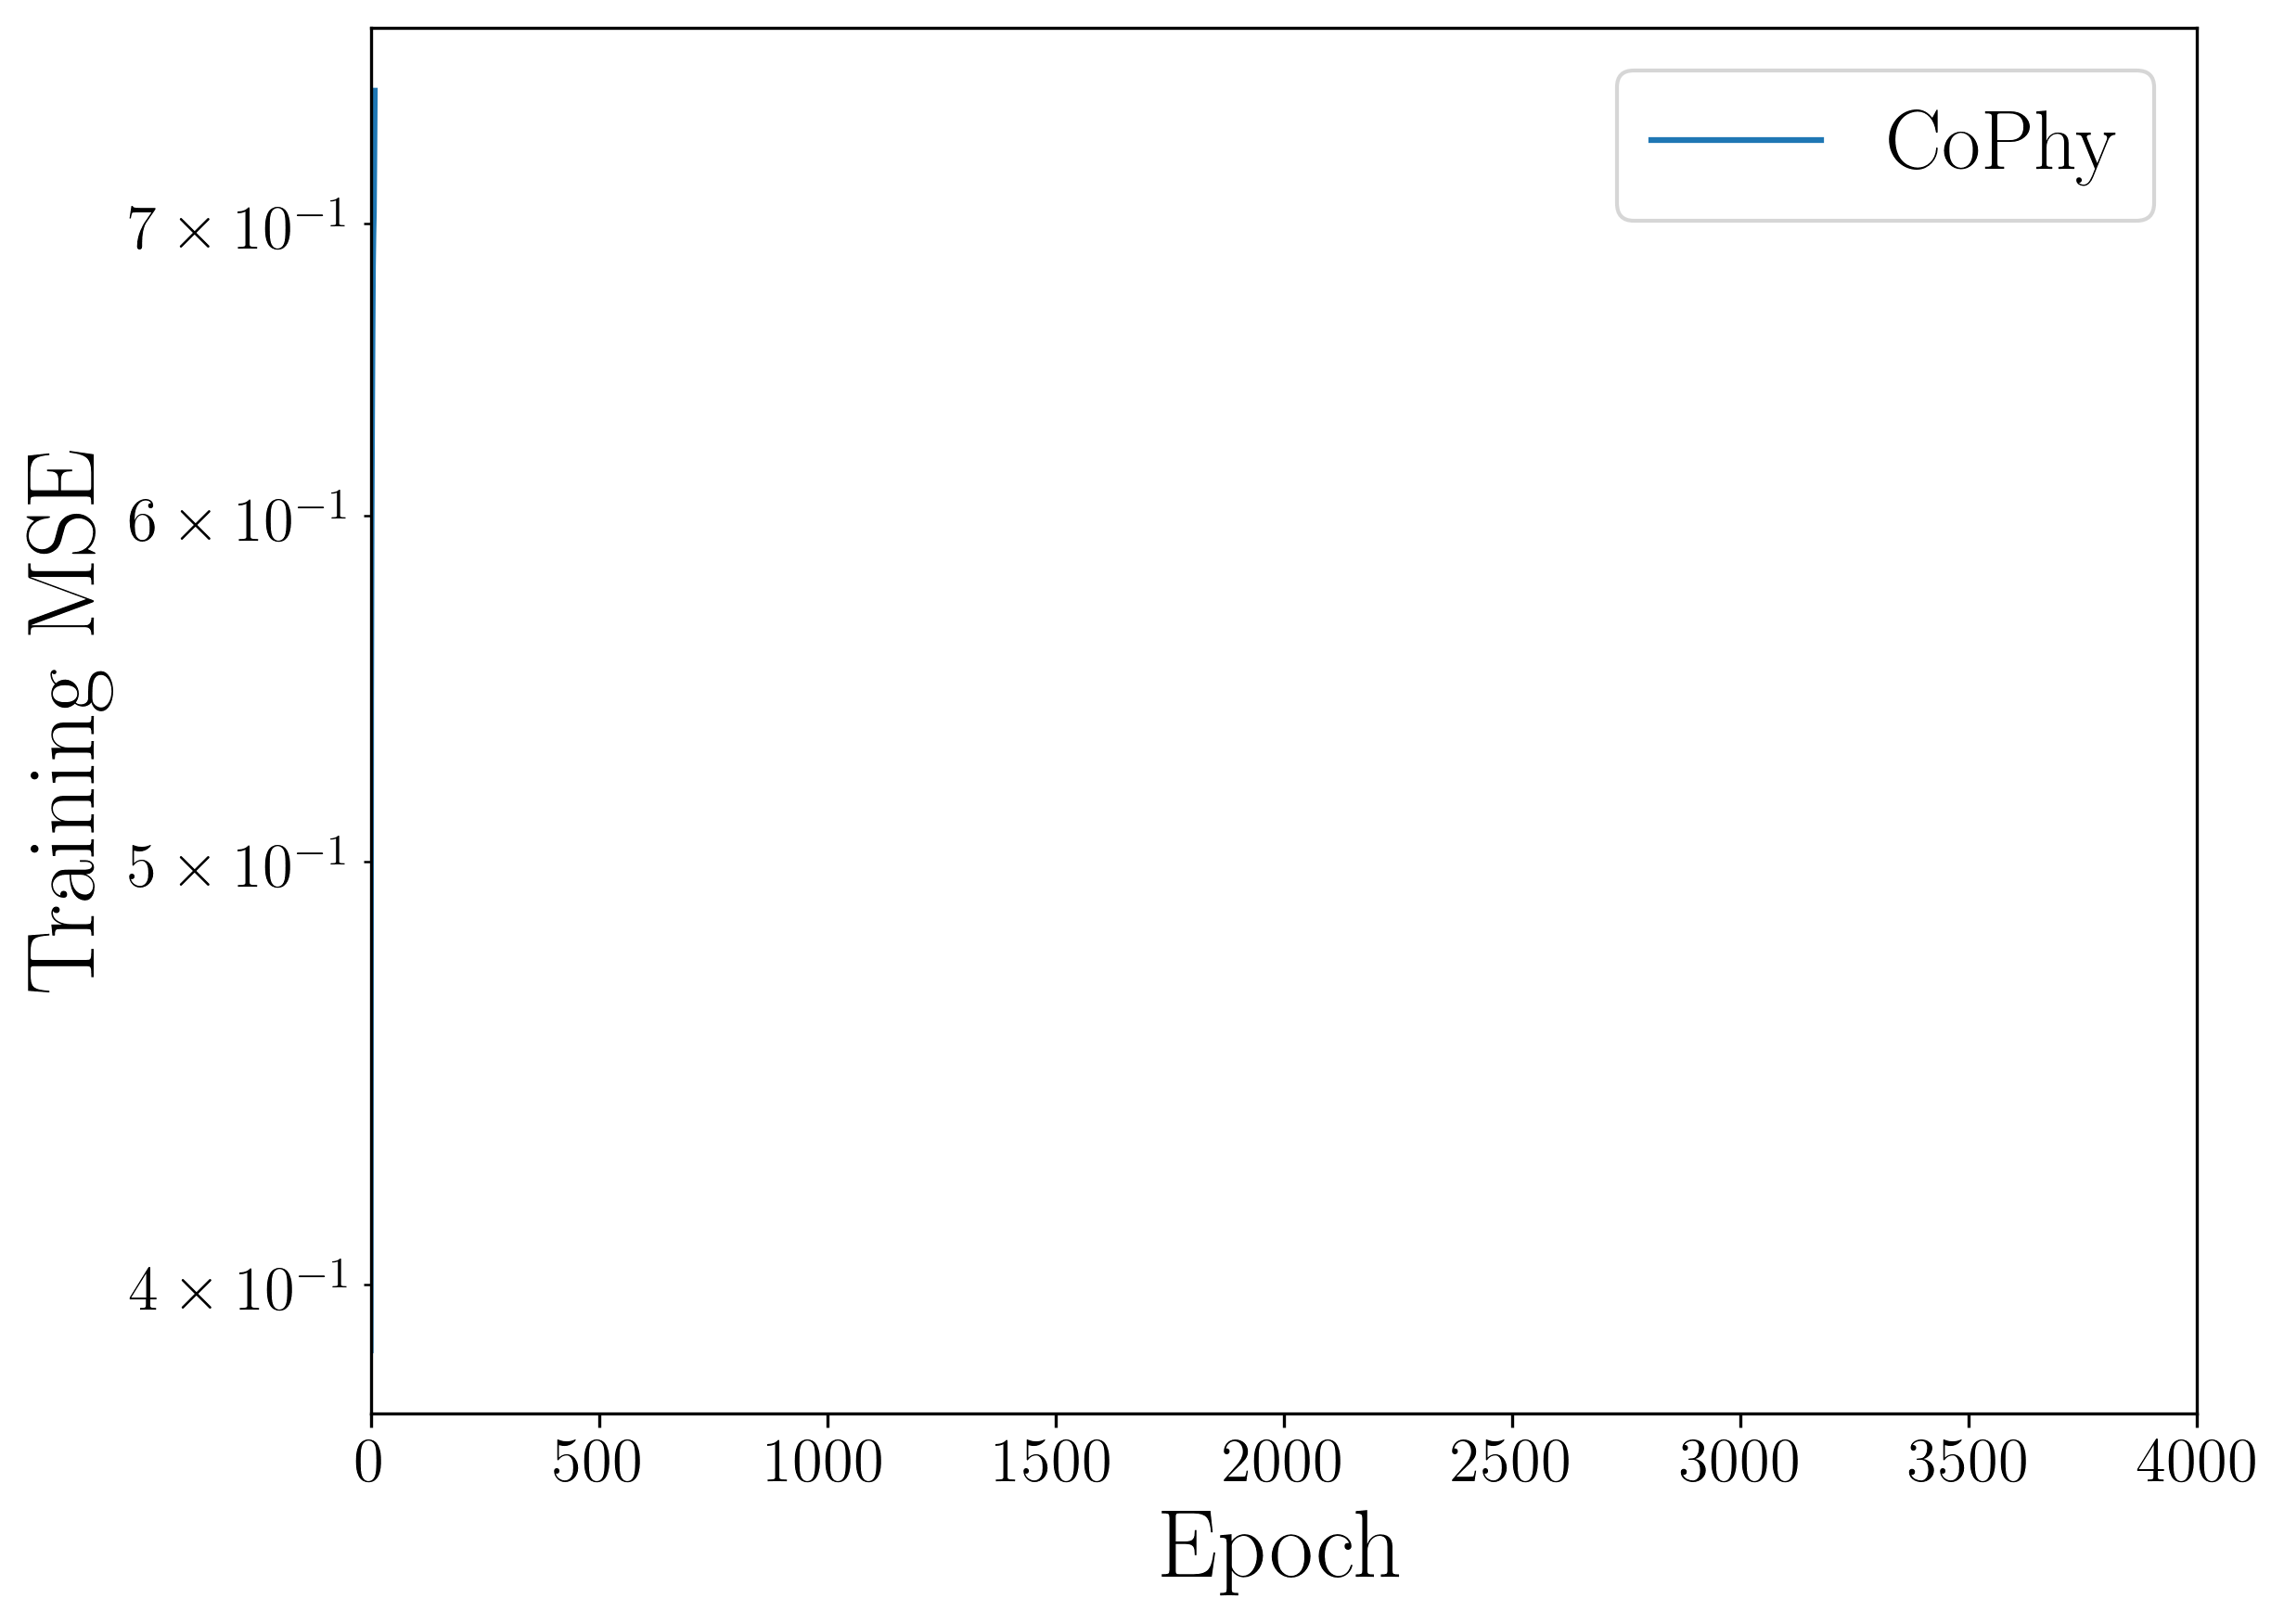

In [8]:
loss_dict = {}
for model in model_list:
    results = find_model(model, train_size)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, num_of_epochs))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['train mse'], ax=ax, label=name)
    title = "Convergence On The Training Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('Training MSE', fontsize=25)
plt.yscale('log')
ax.legend(fontsize=22)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
plt.show()

fig.savefig('../%s.pdf' % title, dpi = 200)

### Phy-Loss

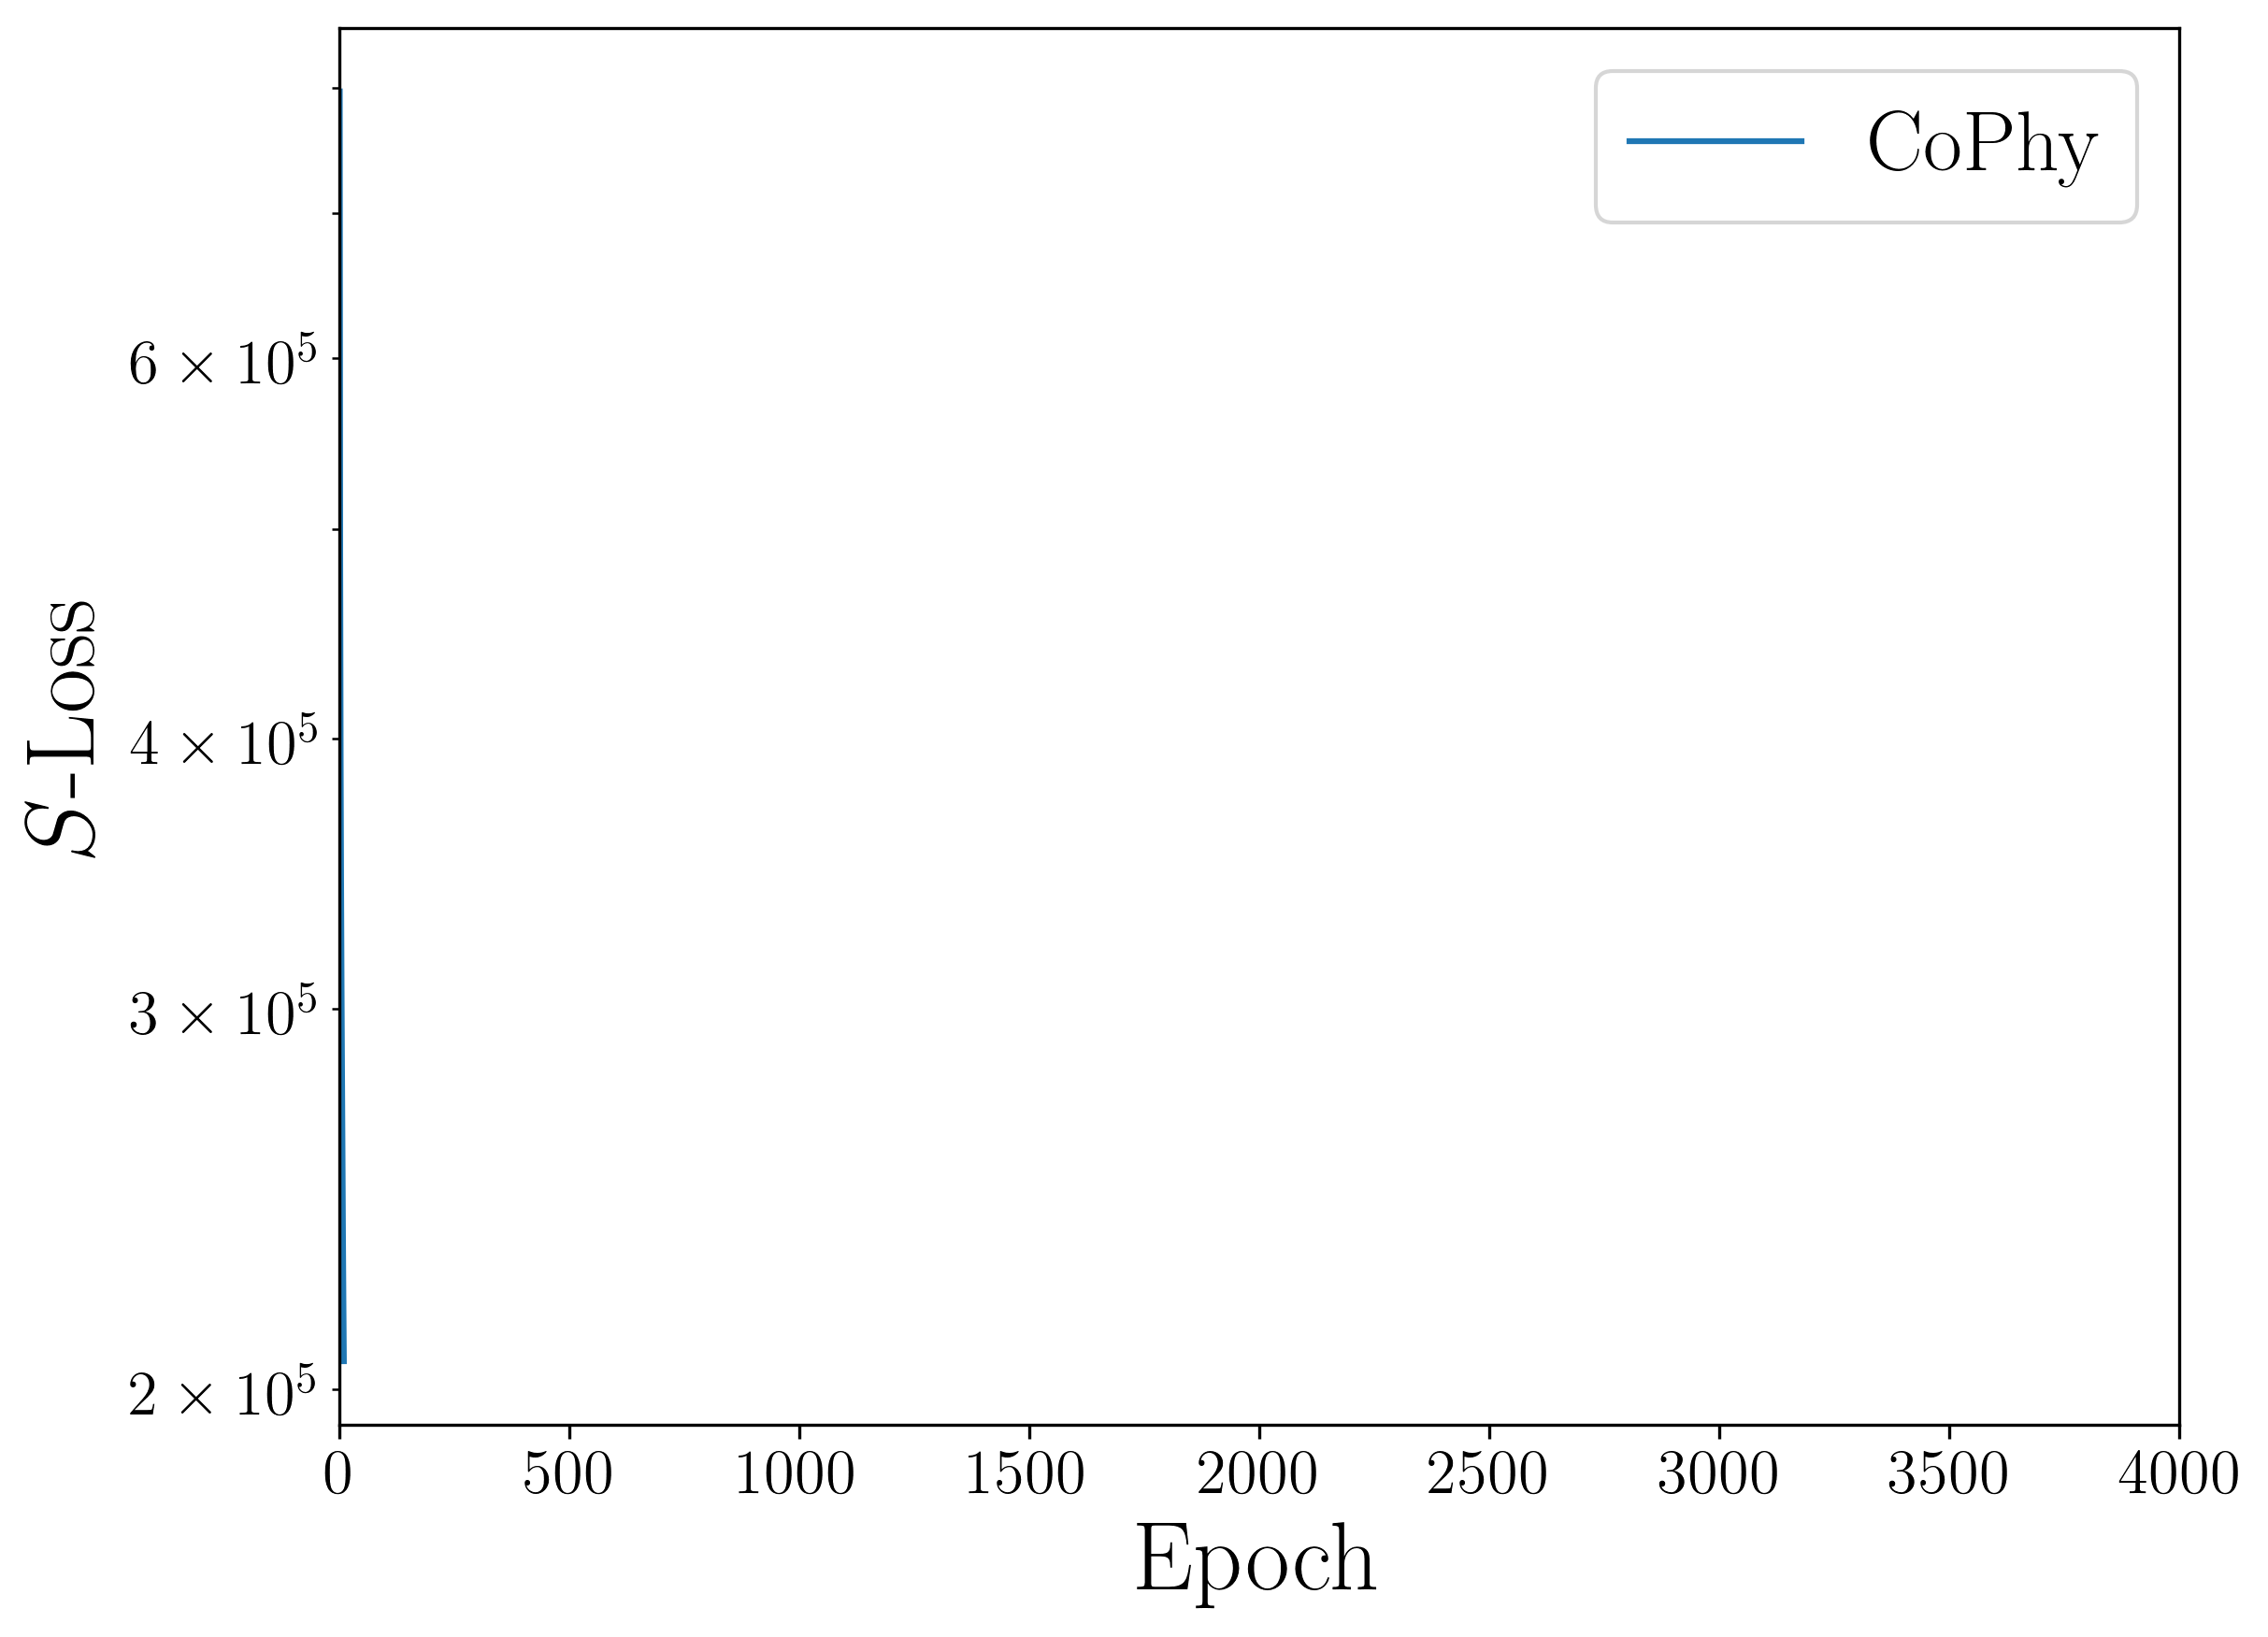

In [9]:
loss_dict = {}
for model in model_list:
    results = find_model(model, train_size)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, num_of_epochs))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
#     print(losses['train norm phy']+losses['test norm phy'])
    sns.lineplot(data=losses['train norm phy']+losses['test norm phy'], ax=ax, label=name)
    title = "Normalized Schrodinger Loss On Training and Test Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('$S$-Loss', fontsize=25)
plt.yscale('log')    
ax.legend(fontsize=22)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
fig.savefig('../%s.pdf' % title, dpi = 200)
plt.show()

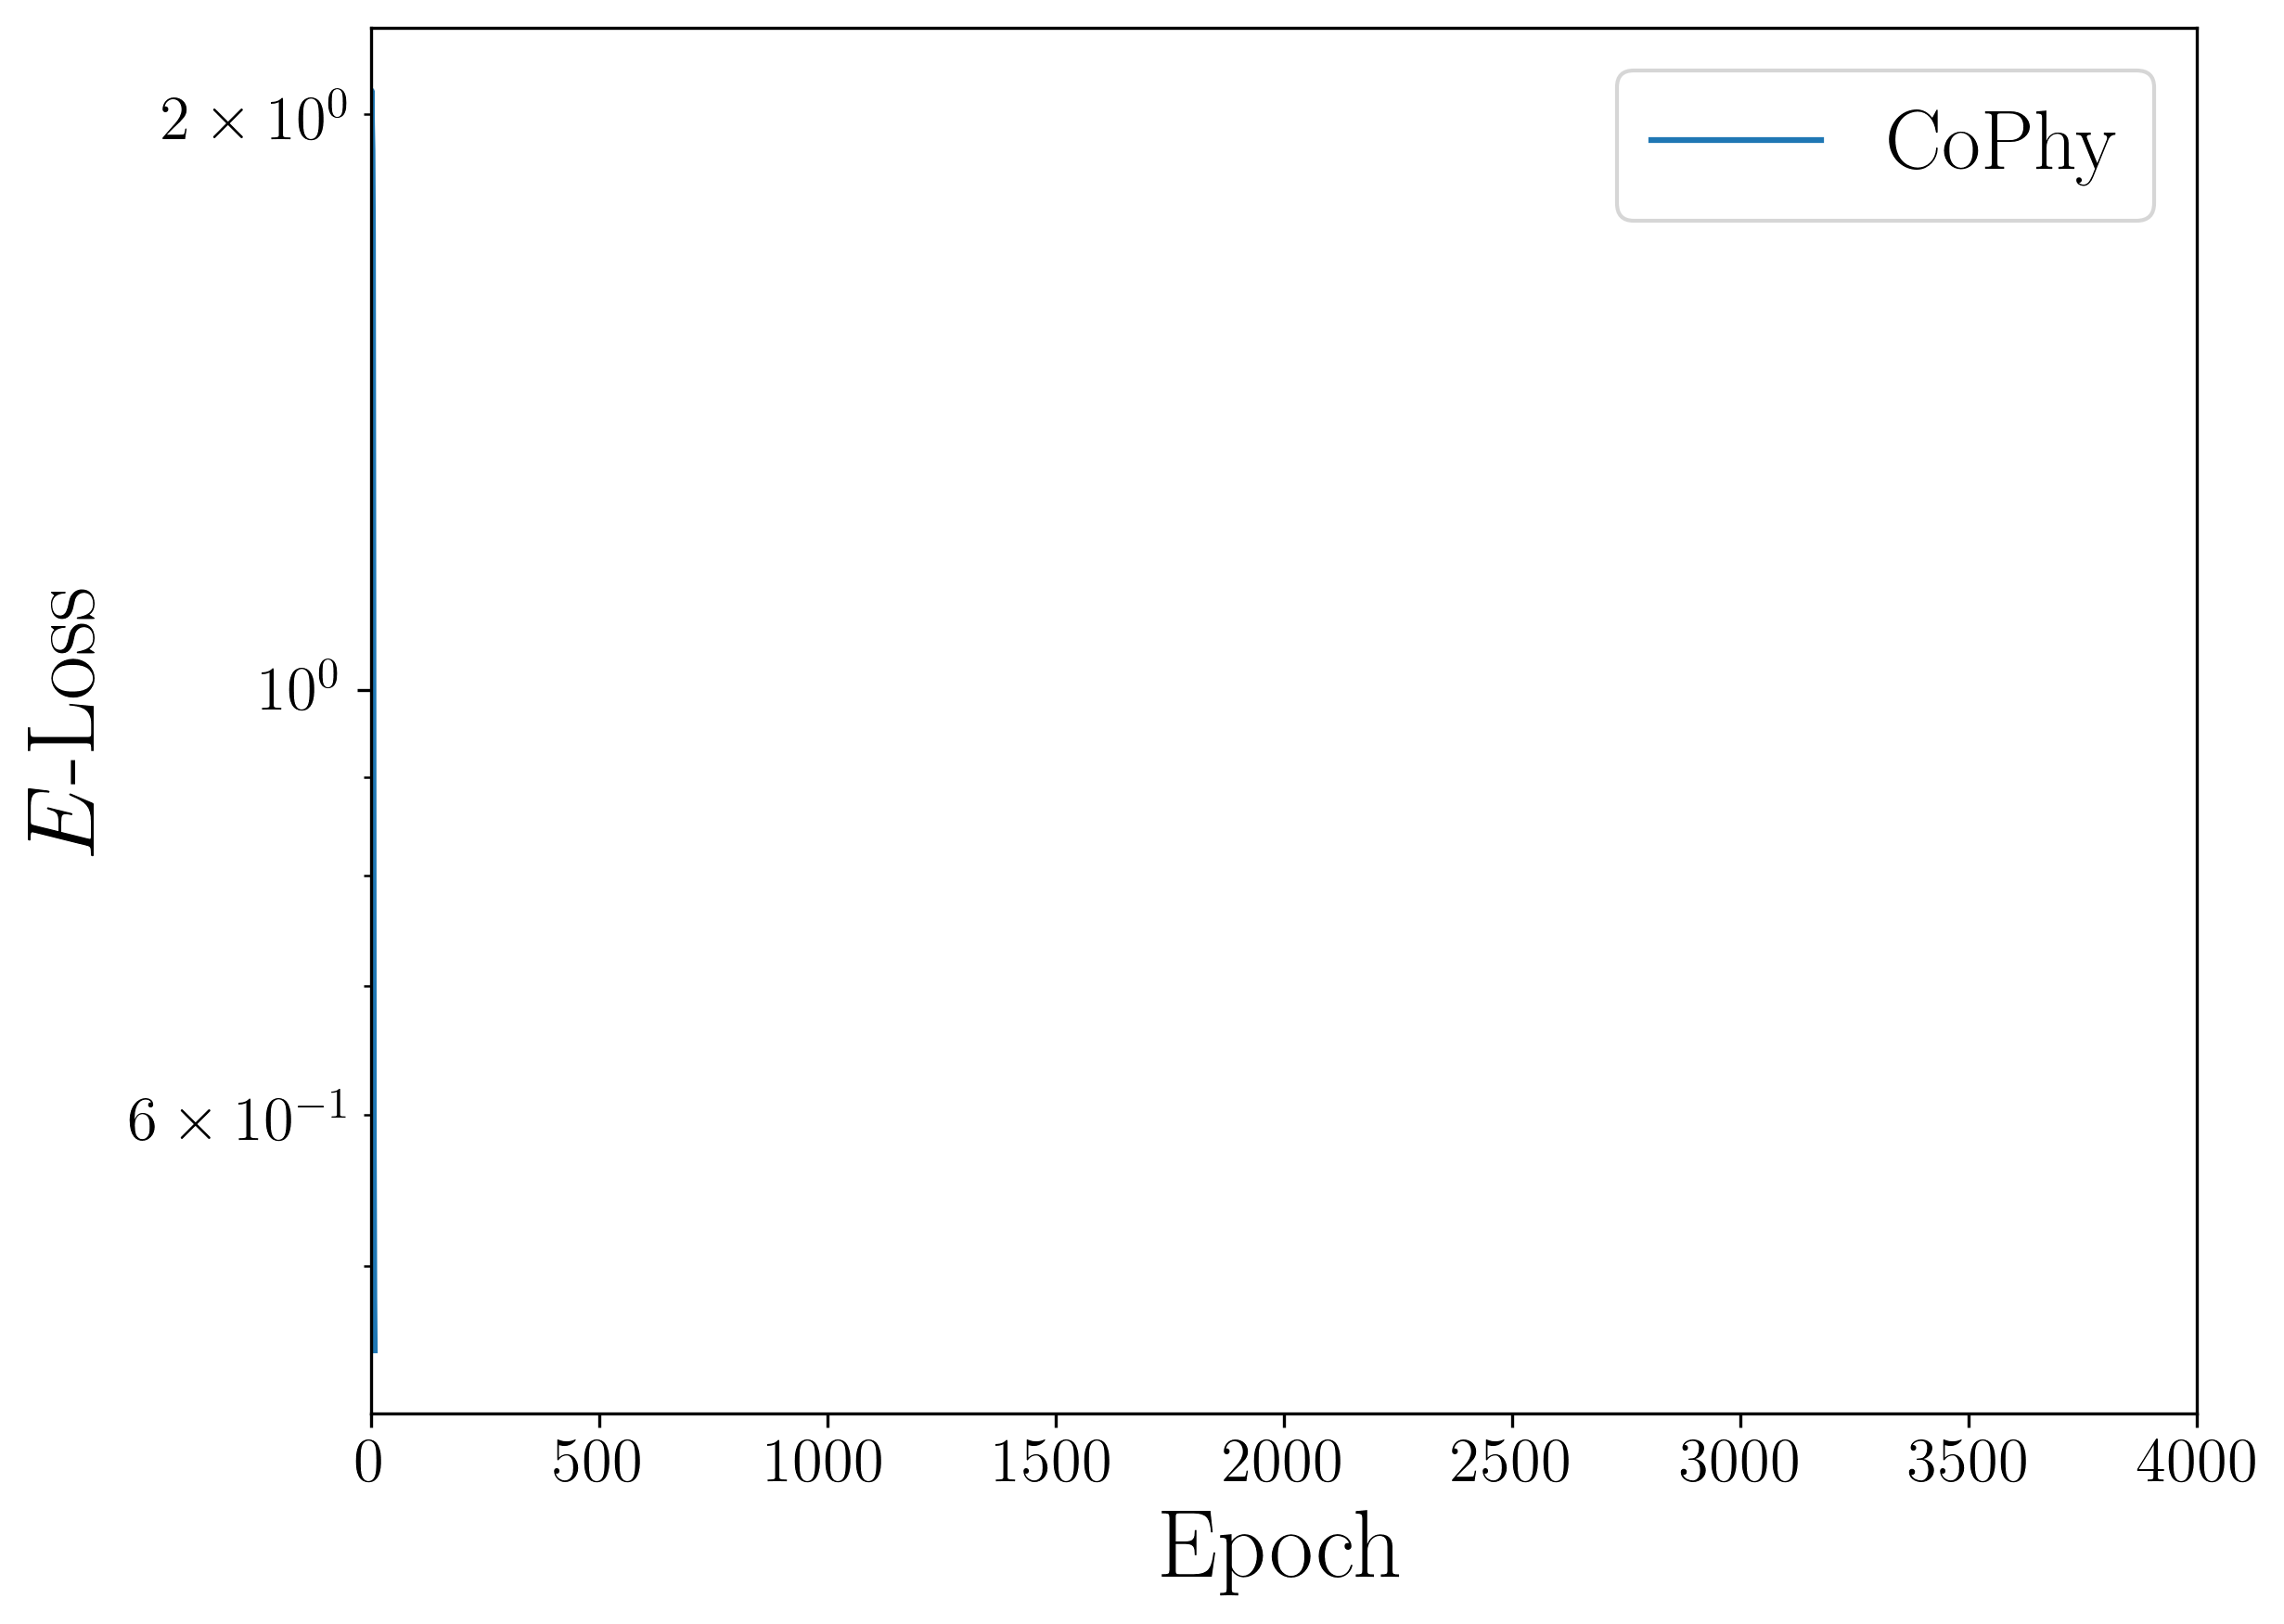

In [10]:
loss_dict = {}
for model in model_list:
    results = find_model(model, train_size)
    loss_dict[model] = [pd.read_csv(i['loss_csv']) for i in results]
    
# calculate loss dict
loss_dict_cat = {}
for model, losses in loss_dict.items():
    # save concatenated loss
    loss_dict_cat[model] = pd.concat(losses)
    col = loss_dict_cat[model].columns
    loss_dict_cat[model].columns = [i.replace("_", " ") for i in col]
        
# only for seven models
fig, ax = plt.subplots(figsize=(8, 6))

ax.set(xlim=(0, num_of_epochs))
mb = master_bar(model_list)
for model in mb:
    losses = loss_dict_cat[model]
    name = model.replace('DNN', 'NN')
    if name == 'cNSE-NNex':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NNex':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NNex-LF':
        name = r'\emph{CoPhy}-PGNN (Label-free)'
    sns.lineplot(data=losses['train e']+losses['test e'], ax=ax, label=name)
    title = "Normalized energy Loss On Training and Test Set"
    ax.set_xlabel("Epoch", fontsize=25)
    ax.set_ylabel('$E$-Loss', fontsize=25)
plt.yscale('log')    
ax.legend(fontsize=22)
fig.subplots_adjust(bottom=0.15, left=0.13, right=0.95, top=0.98)
fig.savefig('../%s.pdf' % title, dpi = 200)
plt.show()

# Load Results

In [11]:
class Filter(object):
    def __init__(self, path):
        self.path=path
        self.dicts = []
    
    def match(self, model='DNN'):
        list_of_files = glob.glob(self.path)
        overlap = []
        epoch = []
        name = []
        loss_list = []
        loss_csv = {}
        train_size = []
        file_path = []
        if len(list_of_files) == 0:
            raise RuntimeError("Empty repository, no txt files found.")
        
        for i in range(len(list_of_files)):
            file = list_of_files[i]
            d = parse_results(file)
            
            loss_params = d['params']['loss_params']
            
            if d['name'] == model and not loss_params['cyclical']:
                self.dicts.append(d)
                name.append(d['name'])
                size = d['params']['data_params']['train_size']
                train_size.append(size)
                overlap.append(d['wave_function_overlap'])
                stop_epoch = min(int(d['epoch']), 499)
                epoch.append(stop_epoch)
                df = pd.read_csv(d['loss_csv'])
                if size not in loss_csv:
                    loss_csv[size] = []
                loss_csv[size].append(df)
                df = df.iloc[[stop_epoch]]
                loss_list.append(df)
                file_path.append(file)

        overlap = np.array(overlap)
        epoch = np.array(epoch)
        train_size = np.array(train_size)
        loss_df = pd.concat(loss_list, sort=False)
        
        df = pd.DataFrame({
            'names': name,
            'path': np.array(file_path),
            'overlap': overlap,
            'epoch': epoch,
            'train size': train_size
        }).reset_index(drop=True)
        
        self.df = df.join(loss_df.reset_index(drop=True))
        self.df = self.df.rename(columns={'test_mse':'mse'})
        print("Number of %s matches = %d" % (model, len(self.dicts)))
        return loss_csv

# Load Data

In [12]:
mse, overlap, epoch, elapse, train_size, dataframes = {}, {}, {}, {}, {}, {}

loss_dict = {}
for name in model_list:
    f = Filter('*.txt')    
    loss_dict[name] = f.match(name)
    name = name.replace('ex', '$_{ex}$')
    df = f.df
    mse[name] = df['mse'].values
    overlap[name] = df['overlap'].values
    epoch[name] = df['epoch'].values
    train_size[name] = df['train size'].values
    df['names'] = name
    dataframes[name] = df
    
    # time 
    time_per_epoch = []
    for item in f.dicts:
        time_per_epoch.append(item['time_per_epoch'])
    elapse[name] = np.array(time_per_epoch)
    
# change back current working directory
os.chdir('../')

Number of CoPhy matches = 1


In [13]:
stats = []
i = 1
for key, value in mse.items():
    model = np.repeat(np.array([key]), len(value))
    ID = np.repeat(np.array([i]), len(value))
    legend = np.repeat(np.array(["%d: %s" % (i, key)]), len(value))
    
    stats.append(pd.DataFrame({
        'models': model,
        'ID': ID,
        'legend': legend,
        'train size': train_size[key],
        'MSE': mse[key],
        'Wave Function Overlap': overlap[key],
        'Stopping Epochs': epoch[key],
        'Average Seconds Per Epoch': elapse[key]
    }))
    i += 1
    
stats = pd.concat(stats)

print("Loaded", len(stats), "Instances.")

Loaded 1 Instances.


## The Effects of Different Training Sizes

### MSE w.r.t Training Size

In [14]:
from IPython.display import display

# mean MSE
df_mse_mean = stats[['models', 'train size', 'MSE']]
df_mse_mean = df_mse_mean.groupby(['models', 'train size'])
df_mse_mean = df_mse_mean.mean()
multi_idx = df_mse_mean.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\overline{MSE}$'
values = df_mse_mean.values.reshape((len(index), len(columns)))
df_mse_mean = pd.DataFrame(data=values, index=index, columns=columns)
display(df_mse_mean)

# std MSE
df_mse_std = stats[['models', 'train size', 'MSE']]
df_mse_std = df_mse_std.groupby(['models', 'train size'])
df_mse_std = df_mse_std.std()
multi_idx = df_mse_std.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\sigma_{MSE}$'
values = df_mse_std.values.reshape((len(index), len(columns)))
df_mse_std = pd.DataFrame(data=values, index=index, columns=columns)
display(df_mse_std)

$\overline{MSE}$,dataShort.mat
CoPhy,0.769197


$\sigma_{MSE}$,dataShort.mat
CoPhy,NaN


### Wave Function Overlap w.r.t Training Size

In [15]:
# mean overlap
df_wf_mean = stats[['models', 'train size', 'Wave Function Overlap']]
df_wf_mean = df_wf_mean.groupby(['models', 'train size'])
df_wf_mean = df_wf_mean.mean()
multi_idx = df_wf_mean.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\overline{I_{wf}}$'
values = df_wf_mean.values.reshape((len(index), len(columns)))
df_wf_mean = pd.DataFrame(data=values, index=index, columns=columns)
display(df_wf_mean)

# std overlap
df_wf_std = stats[['models', 'train size', 'Wave Function Overlap']]
df_wf_std = df_wf_std.groupby(['models', 'train size'])
df_wf_std = df_wf_std.std()
multi_idx = df_wf_std.index.levels
columns = pd.Index(multi_idx[1])
index = pd.Index(multi_idx[0])
index.name = None
columns.name  = '$\sigma_{I_{wf}}$'
values = df_wf_std.values.reshape((len(index), len(columns)))
df_wf_std = pd.DataFrame(data=values, index=index, columns=columns)
display(df_wf_std)

$\overline{I_{wf}}$,dataShort.mat
CoPhy,0.007348


$\sigma_{I_{wf}}$,dataShort.mat
CoPhy,NaN


## Visualize

In [16]:
df_wf_mean

$\overline{I_{wf}}$,dataShort.mat
CoPhy,0.007348


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


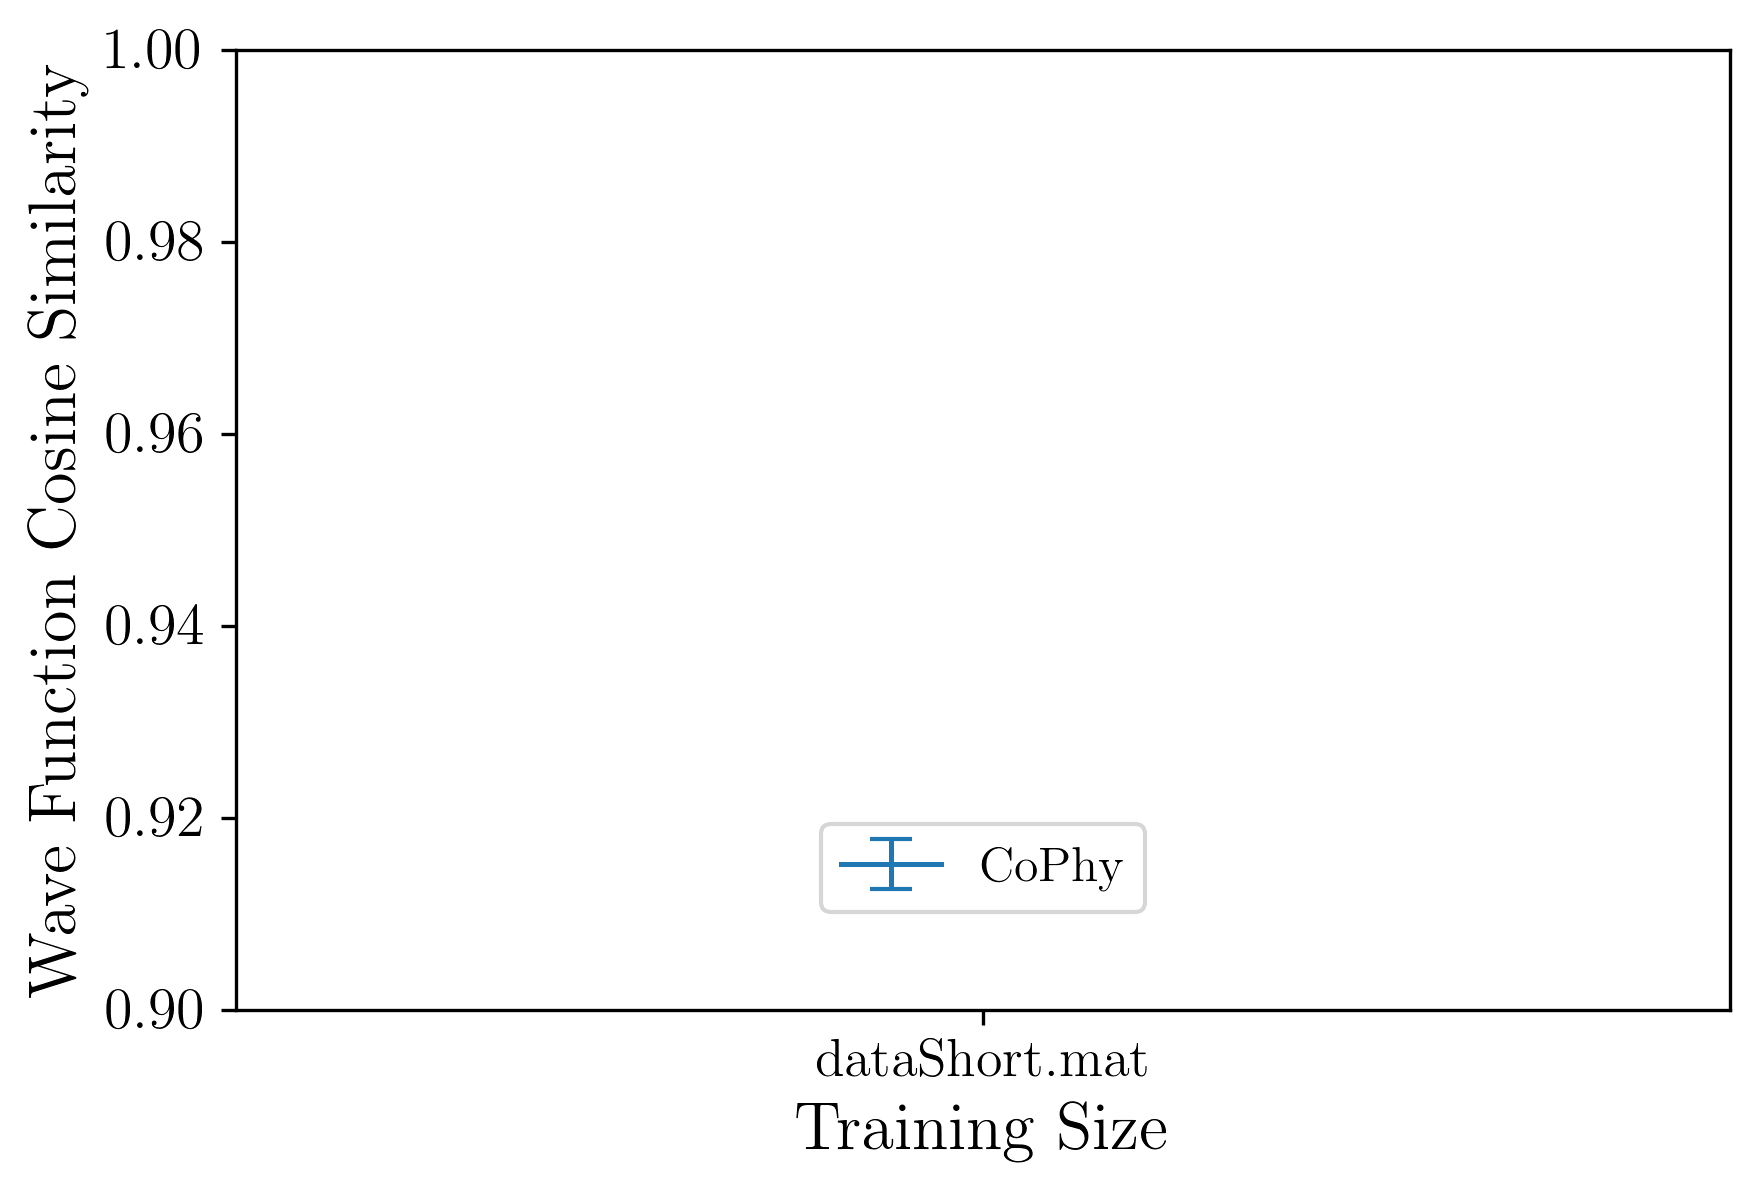

In [17]:
# only for seven models
candidate = model_list

# fig, ax = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(6, 4))

sns.set_palette(sns.color_palette())

for model in candidate:
    serie_mean = df_wf_mean.loc[model]
    serie_std = df_wf_std.loc[model]
    train_size = serie_mean.index.sort_values()
    df_model = pd.DataFrame({
        'train size': train_size.astype(str),
        'mean': serie_mean[train_size].values,
        'std': serie_std[train_size]
    }) 
    
    modified_train_size = list(map(lambda x: x.replace("_", ""), df_model['train size'].values))
     
    color = ax.scatter(
        x=modified_train_size, 
        y=df_model['mean'].values, 
        s=df_model['std'].values * 50000,
        marker='o', 
        alpha=0.2 
    ).get_facecolor()
    
    color = np.array(color.ravel())
    color[-1] = 1.0
    name = model.replace('DNN', 'NN')
    if name == 'NSE-NN$_{ex}$':
        name = 'PGNN-$analogue$'
    if name == 'cNSE-NN$_{ex}$':
        name = r'\emph{CoPhy}-PGNN'
    if name == 'cNS-NN$_{ex}$':
        name = r'\emph{CoPhy}-PGNN (w/o $E$-Loss)'
    if name == 'cNSE-NN':
        name = r'\emph{CoPhy}-PGNN (only $\mathcal{D}_{Tr}$)'
    plt.errorbar(
        x=modified_train_size, 
        y=df_model['mean'].values, 
        yerr=df_model['std'].values * 0.25,
        capsize=5,
        label=name,
        lw=1.2,
        color=color
    )

ax.set_xlabel("Training Size")
ax.set_ylabel("Wave Function Cosine Similarity")
leg = ax.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 0.22),
          fancybox=True, shadow=False, ncol=2)
ax.set(ylim=(0.9, 1.0))
for handle in leg.legendHandles:
    handle._sizes = [30]
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
fig.subplots_adjust(bottom=0.15, left=0.15, right=0.98, top=0.95)

fig.savefig('Cosine Similarity vs. Training Size.pdf')
plt.show()